In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
def batman(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x)) / 2 -
            3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
        ) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

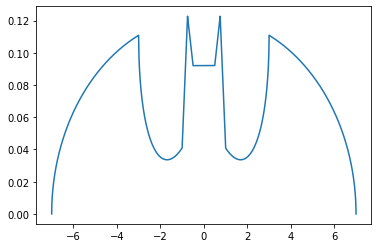

In [3]:
xs = np.linspace(-7,7,10000)
ys = [batman(x) for x in xs]
plt.plot(xs,ys)
plt.show()

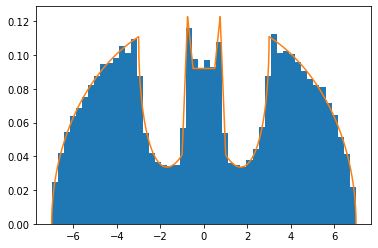

In [4]:
def random_coin(p):
    unif = np.random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True
    
def gaussian_mcmc(func, n_samples):
    states = []
    burn_in = int(n_samples*0.2)
    current = np.random.uniform(-7,7)
    for i in range(n_samples):
        states.append(current)
        movement = np.random.uniform(-7, 7)
        
        curr_prob = func(x=current)
        move_prob = func(x=movement)
        
        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement
    return states[burn_in:]
    
dist = gaussian_mcmc(batman, n_samples=100000)
plt.hist(dist, density=True, bins=50) 
plt.plot(xs,ys)
plt.show()

In [5]:
def update(self):
        '''
        Do a single cluster update of the model state.
        '''
        # Pick a random cell to start the cluster
        i, j = np.random.randint(self.size, size=2)
        cell_value = self.state[i, j]
        cluster = {(i, j)}
        pocket = [(i, j)]

        while len(pocket) > 0:
            # Get a random cell from the pocket
            i, j = pocket.pop(np.random.randint(0, len(pocket)))
            # Check whether to add any of the cell's neighbors to the cluster
            for u, v in [
                ((i - 1) % self.size, j),
                ((i + 1) % self.size, j),
                (i, (j - 1) % self.size),
                (i, (j + 1) % self.size)
            ]:
                if (
                    (self.state[u, v] == cell_value) and
                    ((u, v) not in cluster) and
                    (np.random.uniform(0, 1) < self.cluster_prob)
                ):
                    pocket.append((u, v))
                    cluster.add((u, v))
        # Flip all cells in the cluster
        for (i, j) in cluster:
            self.state[i, j] = -cell_value
        self.step += 1
        self.total_flips += len(cluster)